### Q-2

## Build a prediction model for predicting price

Consider only the below columns and prepare a prediction model for  predicting Price.
 Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
toyota = pd.read_csv('ToyotaCorolla1.csv')
toyota.head()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight
0,1,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165
1,2,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165
2,3,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165
3,4,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165
4,5,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170


In [3]:
toyota = toyota.drop(['Id','Mfg_Month','Mfg_Year','Fuel_Type','Met_Color','Color','Automatic','Cylinders'],axis=1)

In [4]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [5]:
toyota.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [6]:
toyota.dtypes

Price            int64
Age_08_04        int64
KM               int64
HP               int64
cc               int64
Doors            int64
Gears            int64
Quarterly_Tax    int64
Weight           int64
dtype: object

In [7]:
toyota.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [8]:
toyota[toyota.duplicated()].shape

(1, 9)

In [9]:
toyota.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


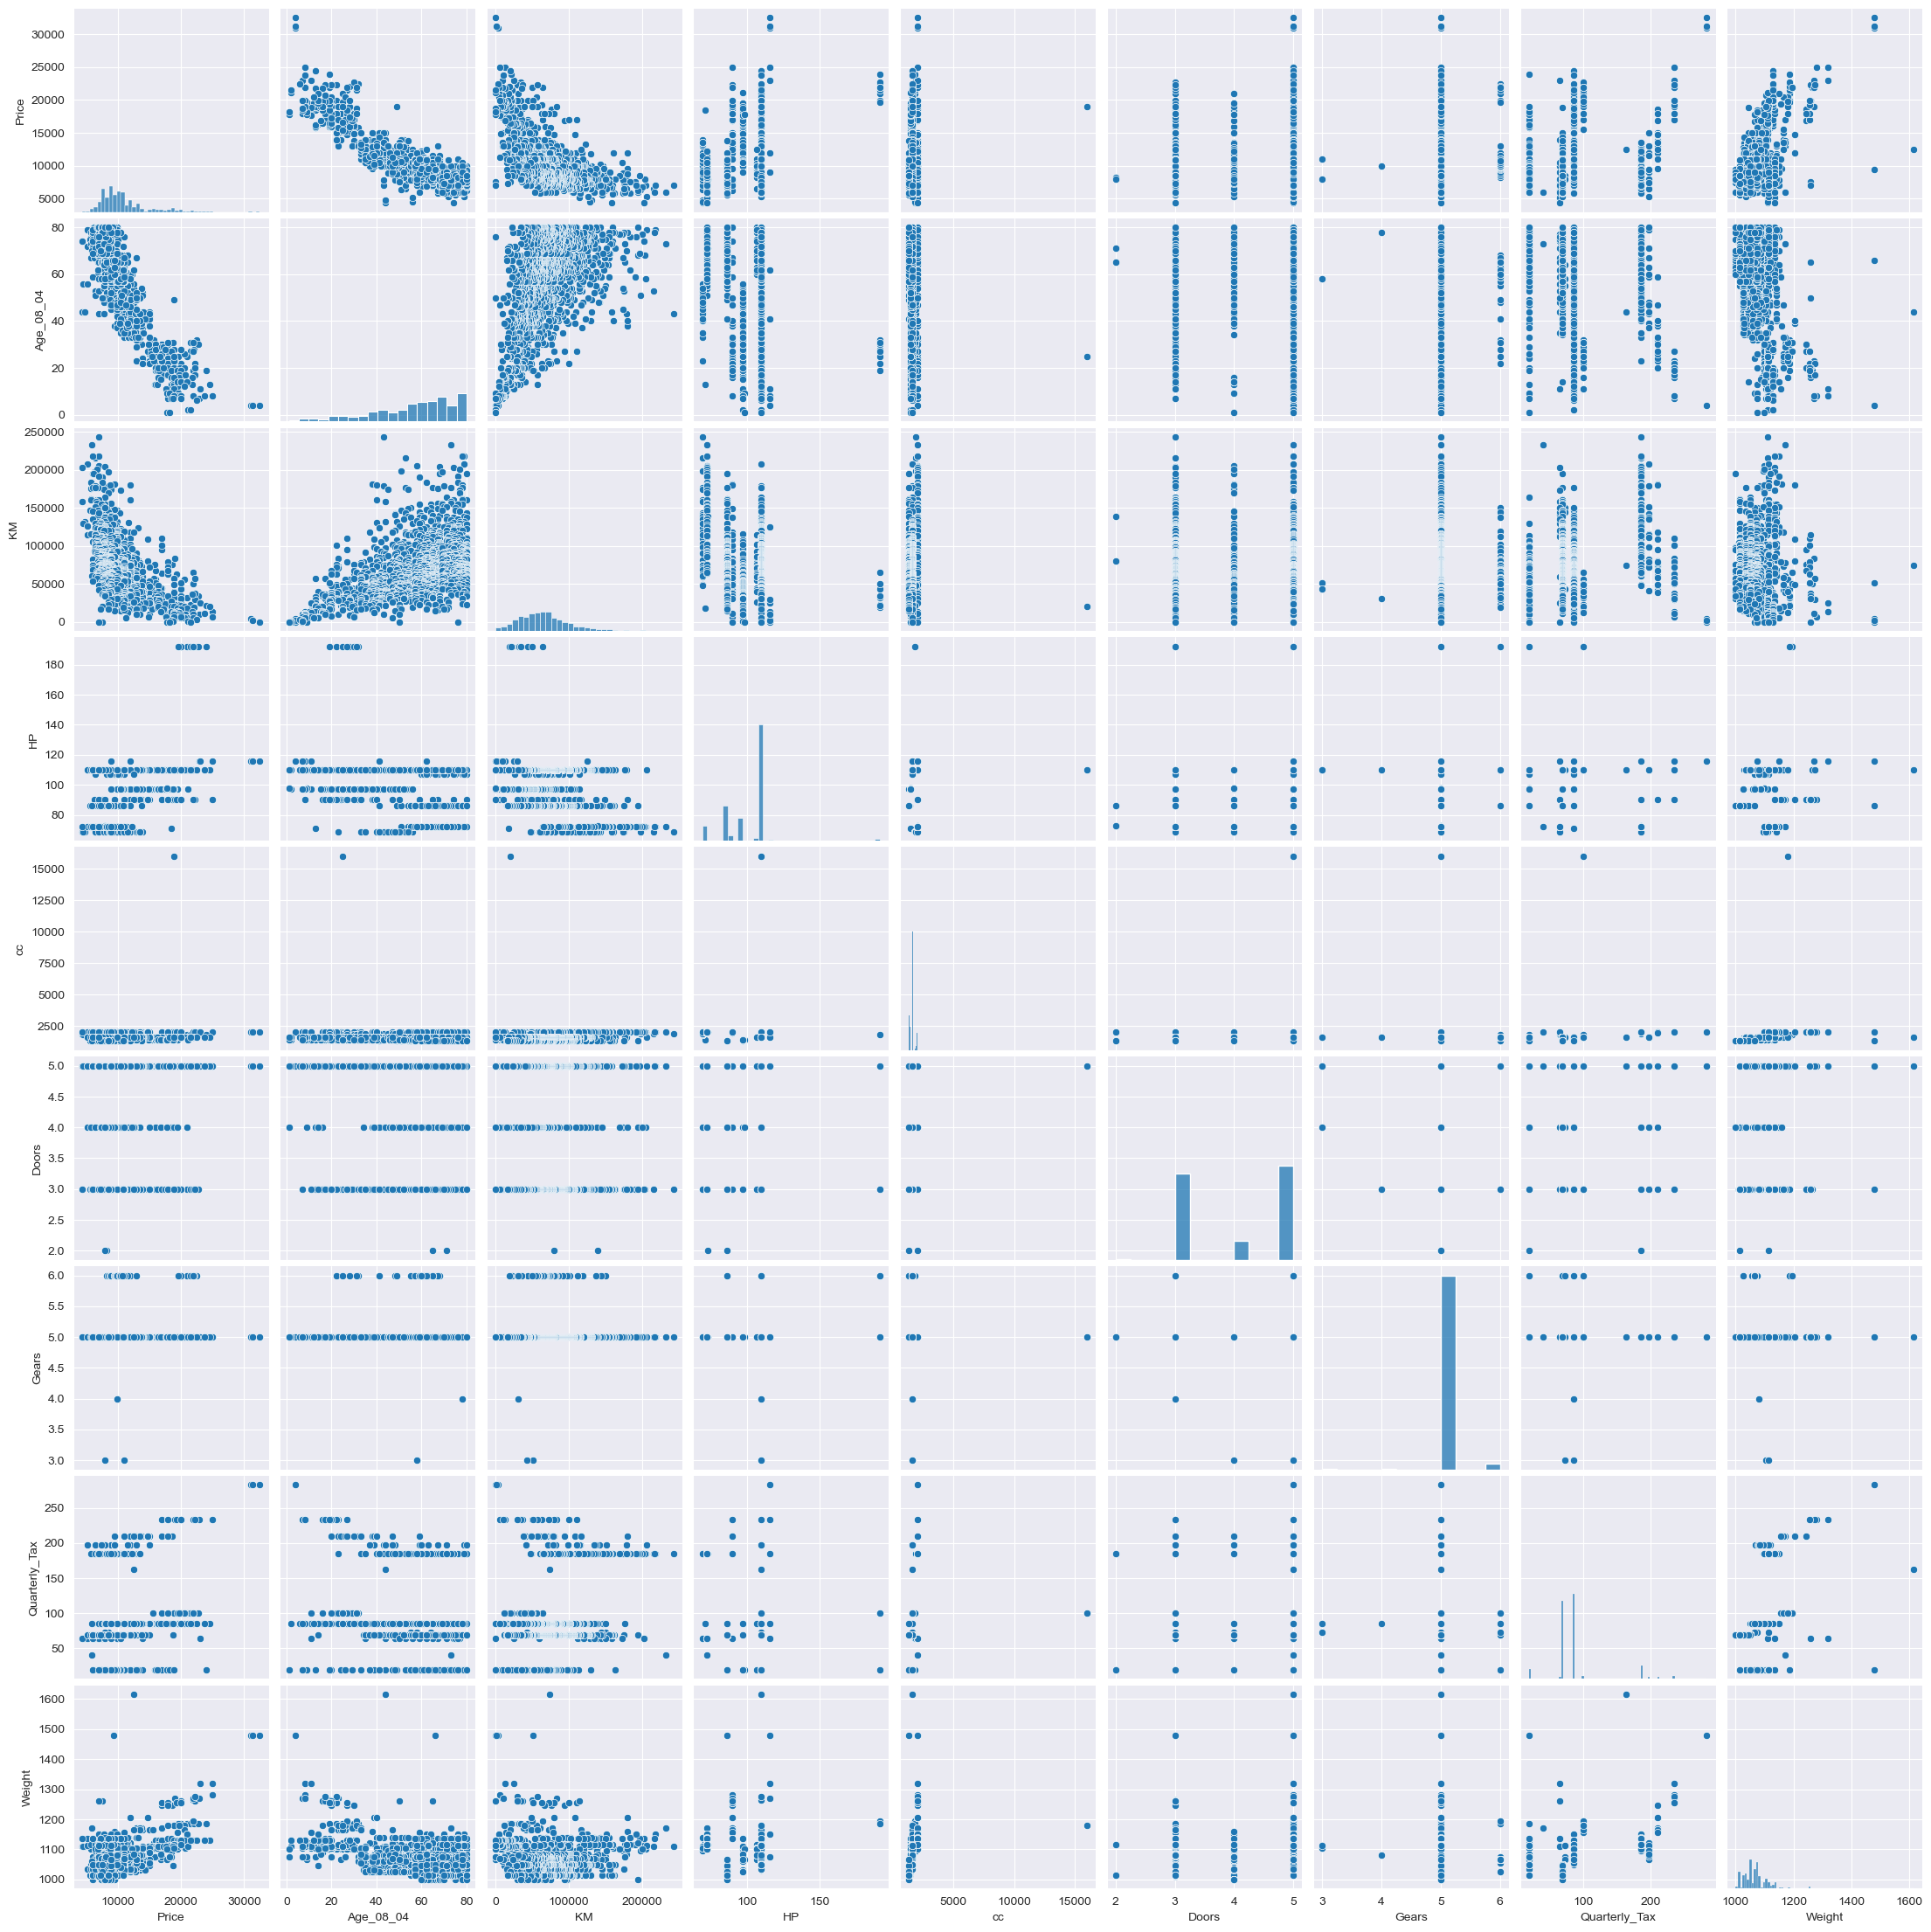

In [10]:
sns.set_style(style='darkgrid')
sns.pairplot(toyota)
plt.show()

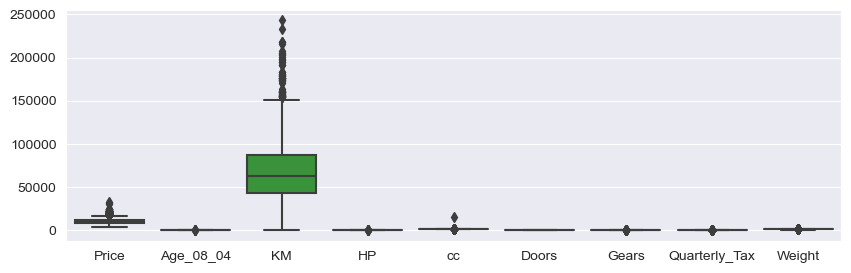

In [11]:
# boxplot for finding the outliers
plt.figure(figsize=(10,3))
sns.boxplot(data=toyota)
plt.show()

In [12]:
Q1 = toyota['KM'].quantile(0.25)
Q3 = toyota['KM'].quantile(0.75)

iqr = Q3 - Q1
upper=Q3+1.5*iqr
lower=Q1+1.5*iqr
car = np.where(toyota['KM'] > upper, upper, toyota['KM'])


In [13]:
toyota['KM'] = pd.Series(np.round(car, 2))

In [14]:
toyota.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986.0,90,2000,3,5,210,1165
1,13750,23,72937.0,90,2000,3,5,210,1165
2,13950,24,41711.0,90,2000,3,5,210,1165
3,14950,26,48000.0,90,2000,3,5,210,1165
4,13750,30,38500.0,90,2000,3,5,210,1170


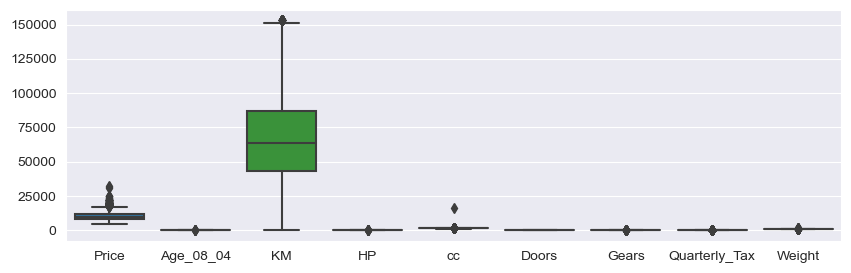

In [15]:
plt.figure(figsize=(10,3))
sns.boxplot(data=toyota)
plt.show()

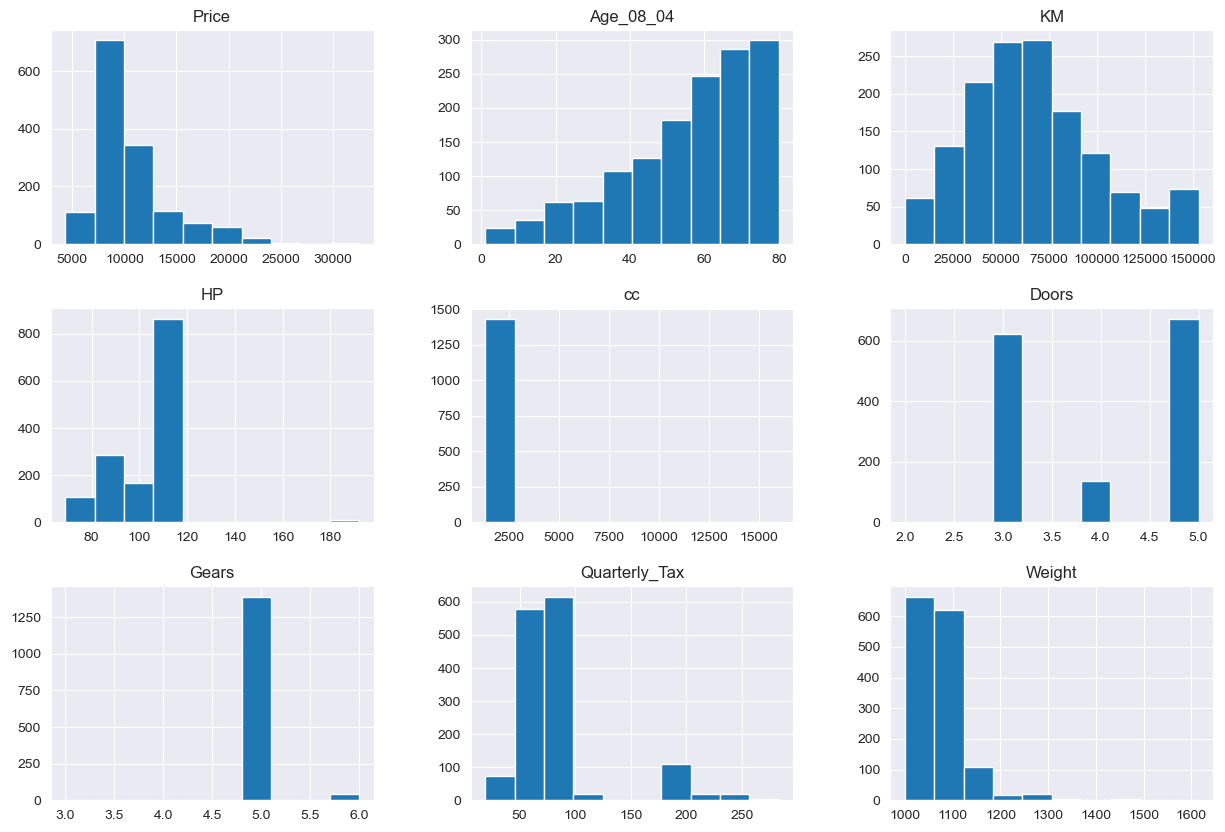

In [16]:
sns.set_style(style='darkgrid')
toyota.hist(figsize=(15,10))
plt.show()

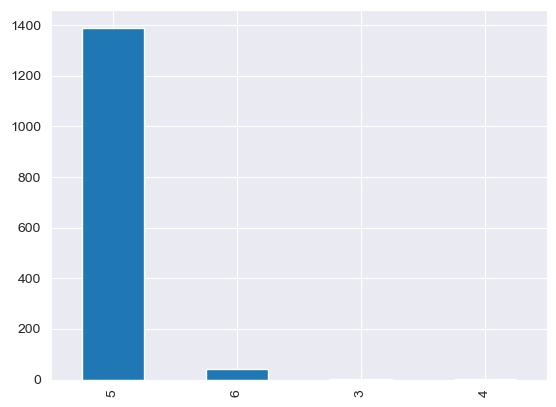

In [17]:
toyota['Gears'].value_counts().plot(kind='bar')
plt.show()

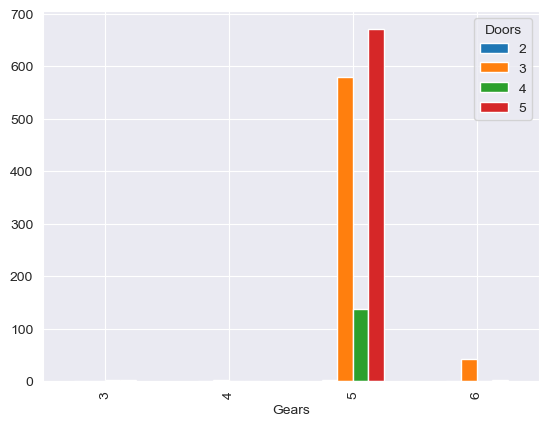

In [18]:
pd.crosstab(toyota.Gears,toyota.Doors).plot(kind='bar')
plt.show()

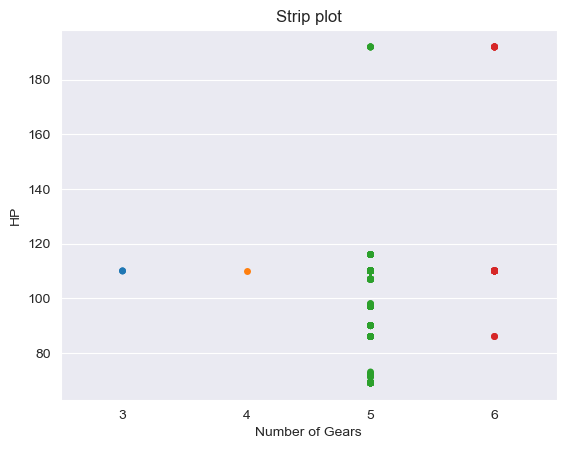

In [19]:
sns.stripplot(x='Gears',y='HP', data=toyota, jitter=False)
plt.title('Strip plot')
plt.xlabel('Number of Gears')
plt.show()

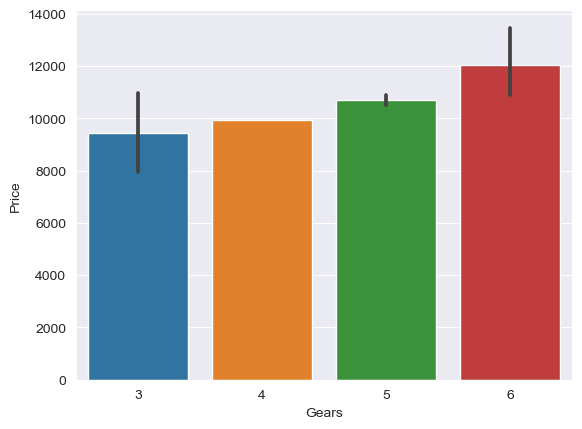

In [20]:
sns.barplot(x='Gears',y='Price',data=toyota)
plt.show()

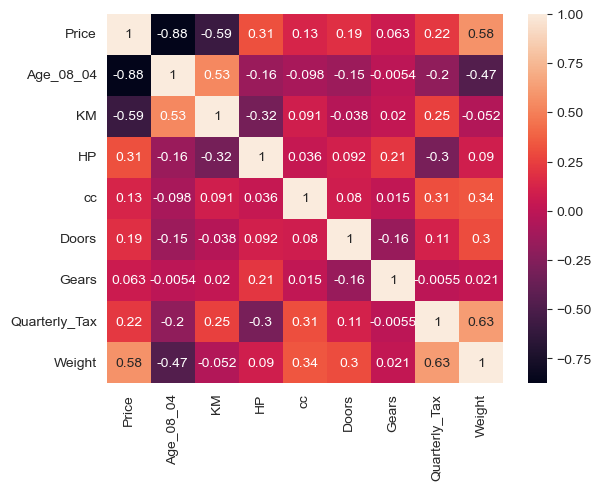

In [21]:
sns.heatmap(toyota.corr(),annot=True)
plt.show()

### Model Building

In [22]:
import statsmodels.formula.api as smf
model = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=toyota).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1119.
Date:                Tue, 14 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:34:49   Log-Likelihood:                -12382.
No. Observations:                1436   AIC:                         2.478e+04
Df Residuals:                    1427   BIC:                         2.483e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5498.4027   1417.904     -3.878      0.000   -8279.803   -2717.002
Age_08_04      -121.0962      2.668    -45.396      0.000    -126.329    -115.863
KM               -0.0221      0.001    -16.134      0.000      -0.025      -0.019
HP               32.8427      2.821     11.644      0.000      27.310      38.376
cc               -0.1327      0.090     -1.466      0.143      -0.310       0.045
Doors             1.6610     40.202      0.041      0.967     -77.200      80.522
Gears           597.8538    198.031      3.019      0.003     209.391     986.317
Quarterly_Tax     3.7117      1.315      2.823      0.005       1.133       6.290
Weight           16.8181      1.073     15.678      0.000      14.714      18.922
==============================================================================
Omnibus:                      145.129   Durbin-Watson:                   1.534
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              906.246
Skew:                          -0.218   Prob(JB):                    1.63e-197
Kurtosis:                       6.867   Cond. No.                     3.04e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.04e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Calculating the VIF

In [23]:
rqs_age = smf.ols("Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=toyota).fit().rsquared
vif_age = 1/(1-rqs_age)

rqs_km = smf.ols("KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=toyota).fit().rsquared
vif_km = 1/(1-rqs_km)

rqs_hp = smf.ols("HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight",data=toyota).fit().rsquared
vif_hp = 1/(1-rqs_hp)

rqs_cc = smf.ols("cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight",data=toyota).fit().rsquared
vif_cc = 1/(1-rqs_cc)

rqs_Doors = smf.ols("Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight",data=toyota).fit().rsquared
vif_Doors = 1/(1-rqs_Doors)

rqs_Gears = smf.ols("Gears~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight",data=toyota).fit().rsquared
vif_Gears = 1/(1-rqs_Gears)

rqs_qt = smf.ols("Quarterly_Tax~Age_08_04+KM+HP+cc+Doors+Gears+Weight",data=toyota).fit().rsquared
vif_qt = 1/(1-rqs_qt)

rqs_wt = smf.ols("Weight~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax",data=toyota).fit().rsquared
vif_wt = 1/(1-rqs_wt)

In [24]:
# Storing vif values in a data frame
d1 = {'Variables':['Age','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_Doors,vif_Gears,vif_qt,vif_wt]}
vif_frame = pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,Age,1.941783
1,KM,1.781229
2,HP,1.408463
3,cc,1.162920
4,Doors,1.157013
5,Gears,1.099229
6,Quarterly_Tax,2.305905
7,Weight,2.515205


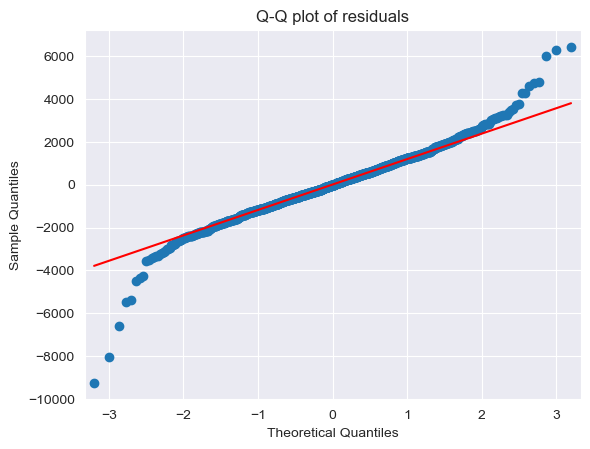

In [25]:
# Finding normality of residuals
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line='q')
plt.title("Q-Q plot of residuals")
plt.show()

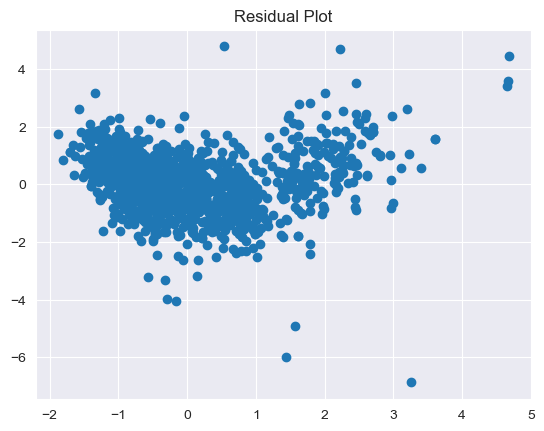

In [26]:
# Residual plot for homoscedasticity
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))
plt.title("Residual Plot")
plt.show()

In [27]:
k = toyota.shape[1]
n = toyota.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020891364902506964

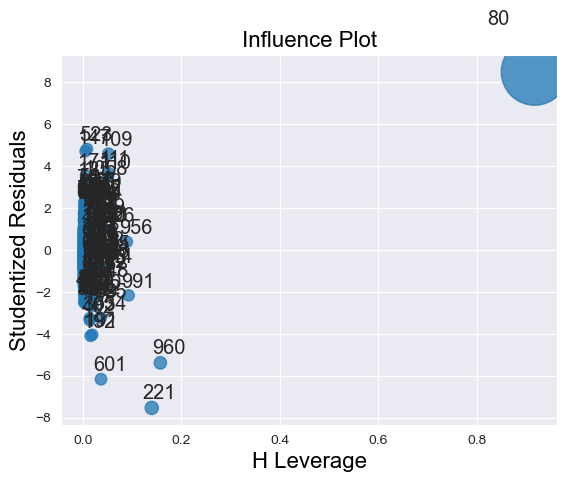

In [28]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

sm.graphics.influence_plot(model)
plt.show()

### Model Deletion Diagnostics
### Detecting Influencers/Outlirs
### Cook's Distance

In [30]:
from statsmodels.graphics.regressionplots import influence_plot
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance
k = 8
n = 1436
3*(k+1)/n

0.018802228412256268

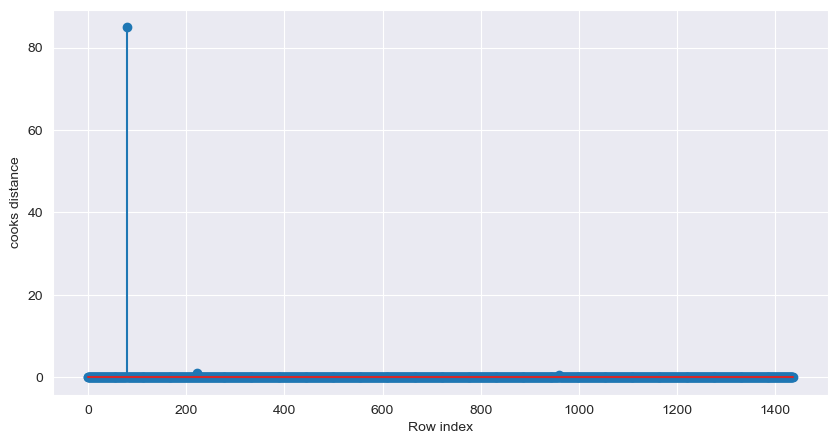

In [31]:
#plot the influencers value using stem plot
fig=plt.figure(figsize=(10,5))
plt.stem(np.arange(len(toyota)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('cooks distance')
plt.show()

In [32]:
np.where(c>0.018)

(array([  14,   16,   80,  109,  110,  111,  141,  191,  192,  221,  523,
         601,  654,  960,  991, 1058], dtype=int64),)

In [33]:
toyota = toyota.drop(toyota.index[[14,16,49,80,109,110,111,141,191,192,221,
         523,601,654,960,991,1058]],axis = 0).reset_index()

In [34]:
toyota.shape

(1419, 10)

In [35]:
toyota.head()

,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986.0,90,2000,3,5,210,1165
1,1,13750,23,72937.0,90,2000,3,5,210,1165
2,2,13950,24,41711.0,90,2000,3,5,210,1165
3,3,14950,26,48000.0,90,2000,3,5,210,1165
4,4,13750,30,38500.0,90,2000,3,5,210,1170


In [36]:
toyota = toyota.drop(['index'],axis=1)
toyota.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986.0,90,2000,3,5,210,1165
1,13750,23,72937.0,90,2000,3,5,210,1165
2,13950,24,41711.0,90,2000,3,5,210,1165
3,14950,26,48000.0,90,2000,3,5,210,1165
4,13750,30,38500.0,90,2000,3,5,210,1170


### Buliding Best Model

In [37]:
best_model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota).fit()
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     1375.
Date:                Tue, 14 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:36:45   Log-Likelihood:                -12023.
No. Observations:                1419   AIC:                         2.406e+04
Df Residuals:                    1410   BIC:                         2.411e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.438e+04   1499.013     -9.593      0.000   -1.73e+04   -1.14e+04
Age_08_04      -111.0358      2.445    -45.411      0.000    -115.832    -106.239
KM               -0.0183      0.001    -14.724      0.000      -0.021      -0.016
HP               30.4979      2.764     11.032      0.000      25.075      35.921
cc               -3.4722      0.299    -11.604      0.000      -4.059      -2.885
Doors          -130.4949     36.399     -3.585      0.000    -201.896     -59.094
Gears           307.6933    181.572      1.695      0.090     -48.487     663.873
Quarterly_Tax     2.1343      1.366      1.562      0.118      -0.546       4.814
Weight           31.4404      1.404     22.401      0.000      28.687      34.194
==============================================================================
Omnibus:                       42.726   Durbin-Watson:                   1.726
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.035
Skew:                           0.178   Prob(JB):                     2.08e-19
Kurtosis:                       4.152   Cond. No.                     3.71e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.71e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
round(best_model.predict(toyota[['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax','Weight']]),3)

0       16232.389
1       15758.700
2       16217.638
3       15880.772
4       15767.237
          ...    
1414     9213.375
1415     8594.047
1416     8741.297
1417     8854.158
1418    10931.871
Length: 1419, dtype: float64

In [41]:
#New data for prediction
new_data=pd.DataFrame({'Age_08_04':30,"KM":40000,"HP":100,"cc":2000,"Doors":4,"Gears":4,"Quarterly_Tax":210,"Weight":1200},index=[1])

In [42]:
best_model.predict(new_data)

1    16549.85882
dtype: float64